#### Bivariate anlysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [3]:
visa_df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


- two numerical coumns
- two catagorical columns


In [4]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
cat_cols = visa_df.select_dtypes(include="object").columns
num_cols = visa_df.select_dtypes(exclude="object").columns
cat_cols

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### continet and case_status

In [6]:
visa_df["continent"].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df["case_status"].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

### How many asia people are got visa

In [10]:
con1 = (visa_df["continent"]=="Asia")
con2 = (visa_df["case_status"]=="Certified")
con  = con1 & con2
len(visa_df[con])
print(f"the no of employe from asia who got there visa is {len(visa_df[con])}")

the no of employe from asia who got there visa is 11012


In [11]:
con1 = (visa_df["continent"]=="Asia")
con2 = (visa_df["case_status"]=="Denied")
con  = con1 & con2
len(visa_df[con])
print(f"the no of employe from asia who Dose not get there visa is {len(visa_df[con])}")

the no of employe from asia who Dose not get there visa is 5849


In [12]:
continent = visa_df["continent"].value_counts()
continent
for i ,j in continent.items():
    print(i)
    
print(type(continent))

Asia
Europe
North America
South America
Africa
Oceania
<class 'pandas.core.series.Series'>


In [13]:
pd.DataFrame(data=continent)

,count
continent,
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


In [14]:
for i ,j in continent.items():
    con1 = (visa_df["continent"]==i)
    con2 = (visa_df["case_status"]=="Certified")
    con  = con1 & con2
    len(visa_df[con])
    print(f"the no of employe from asia who got there visa is {len(visa_df[con])}")

the no of employe from asia who got there visa is 11012
the no of employe from asia who got there visa is 2957
the no of employe from asia who got there visa is 2037
the no of employe from asia who got there visa is 493
the no of employe from asia who got there visa is 397
the no of employe from asia who got there visa is 122


In [15]:
for i ,j in continent.items():
    con1 = (visa_df["continent"]==i)
    con2 = (visa_df["case_status"]=="Denied")
    con  = con1 & con2
    len(visa_df[con])
    print(f"the no of employe from asia who dosenot got there visa is {len(visa_df[con])}")

the no of employe from asia who dosenot got there visa is 5849
the no of employe from asia who dosenot got there visa is 775
the no of employe from asia who dosenot got there visa is 1255
the no of employe from asia who dosenot got there visa is 359
the no of employe from asia who dosenot got there visa is 154
the no of employe from asia who dosenot got there visa is 70


In [16]:
keys = visa_df["continent"].unique()
keys

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [17]:
Denied = []
for i ,j in continent.items():
    con1 = (visa_df["continent"]==i)
    con2 = (visa_df["case_status"]=="Denied")
    con  = con1 & con2
    len(visa_df[con])
    Denied.append(len(visa_df[con]))


In [18]:
certiifaied = []
for i ,j in continent.items():
    con1 = (visa_df["continent"]==i)
    con2 = (visa_df["case_status"]=="Certified")
    con  = con1 & con2
    len(visa_df[con])
    certiifaied.append(len(visa_df[con]))

In [19]:
# certiifaied,Denied = [],[]
# for i ,j in continent.items():
#     con1 = (visa_df["continent"]==i)
#     con2 = (visa_df["case_status"]=="Certified")
#     con3 = (visa_df["case_status"]=="Denied")

#     con  = con1 & con2
#     denaied  = con1 & con3
#     len(visa_df[con])
#     certiifaied.append(len(visa_df[con]))
# pd.DataFrame(zip(certiifaied,Denied),columns=["certiifaied","Denied"],index=keys)

In [23]:
pd.DataFrame(zip(certiifaied,Denied),columns=["certiifaied","Denied"],index=keys)

,certiifaied,Denied
Asia,11012,5849
Africa,2957,775
North America,2037,1255
Europe,493,359
South America,397,154
Oceania,122,70


### Cross Tab
-  cross tab will take two argumemnts 
- first argumet is index
- second arguments is column

In [ ]:
col1 = visa_df["continent"]
col2 = visa_df["case_status"]
result = pd.crosstab(col1,col2).T
result

result1 = pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='case_status'>

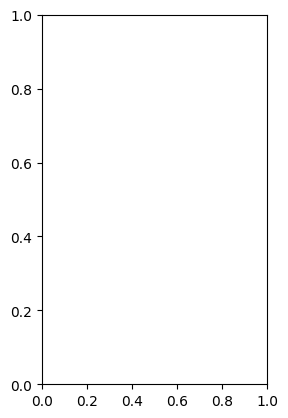

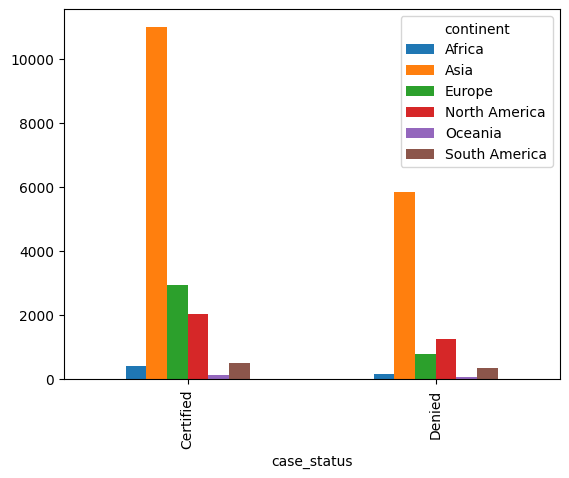

In [ ]:
plt.subplot(1,2,1)
result.plot(kind='bar')




In [ ]:
# plt.subplot(1,2,2)
# result1.plot(kind='bar')

In [ ]:
col1 = visa_df["continent"]
col2 = visa_df["education_of_employee"]
col3 = visa_df["case_status"]

col = [col1,col2]    
res1 = pd.crosstab(col,col3)
res1

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

In [ ]:
col1 = visa_df["continent"]
col2 = visa_df["education_of_employee"]
col3 = visa_df["case_status"]

col = [col1,col3]
res = pd.crosstab(col,col2)
res

education_of_employee      Bachelor's  Doctorate  High School  Master's
continent     case_status                                              
Africa        Certified            81         43           23       250
              Denied               62         11           43        38
Asia          Certified          4407        780          676      5149
              Denied             2761        143         1614      1331
Europe        Certified          1040        788          162       967
              Denied              259         58          328       130
North America Certified           641        207          210       979
              Denied              584         51          191       429
Oceania       Certified            38         19           19        46
              Denied               28          3           17        22
South America Certified           160         75           74       184
              Denied              173         14           63       109

<Axes: xlabel='continent,case_status'>

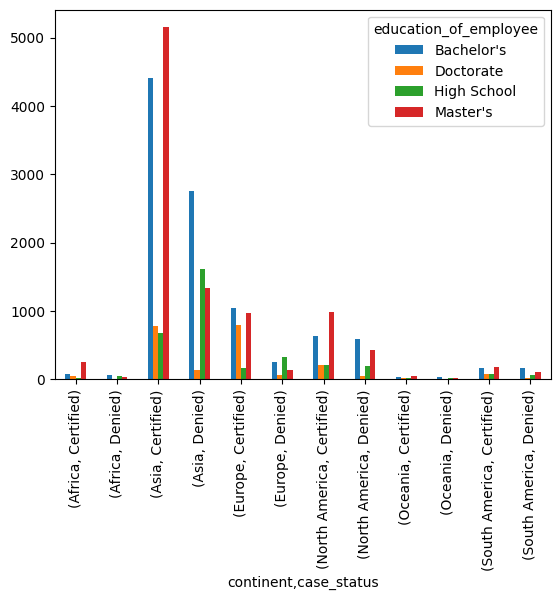

In [ ]:
res.plot(kind="bar")

<Axes: xlabel='continent,education_of_employee'>

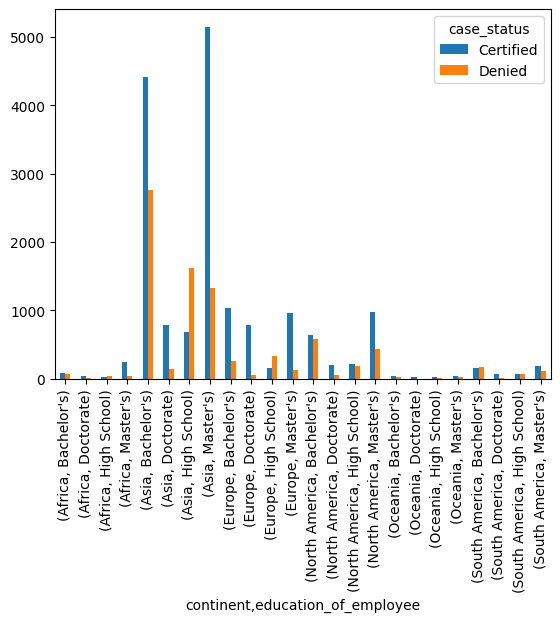

In [ ]:
res1.plot(kind="bar")

In [ ]:
# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# res.plot(kind="bar")


# plt.subplot(1,2,2)
# res1.plot(kind="bar")

# plt.show()


#### Numerical columns - Numeraical columns

- for ploting numeraical columns we use scatter plots 
- scatter plot gives the relation between two numrical columns 
- it is under matplotlib
- plt.scatterplot()

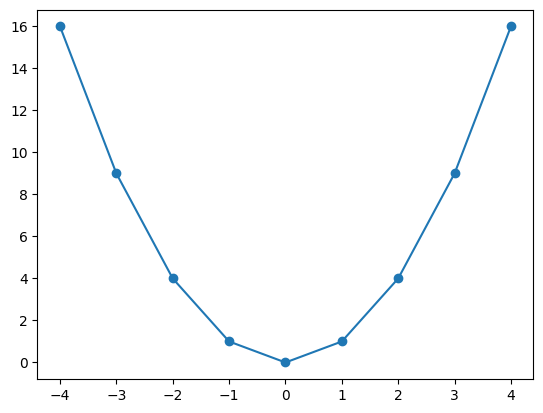

In [ ]:
x = [i for i in range(-4,5)]
y = [i**2 for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [ ]:
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

### Scatter plot no 1
- No relation

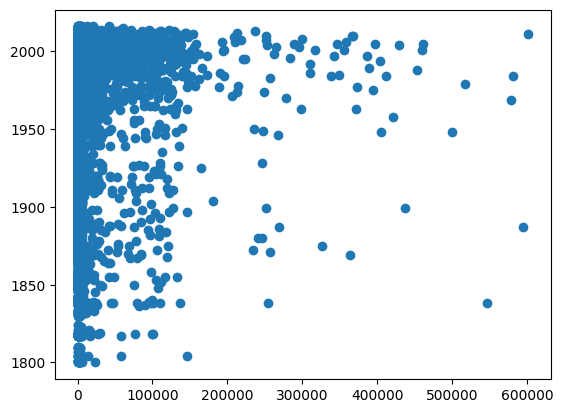

In [ ]:
### Scatter plot no 1

x = (visa_df["no_of_employees"])
y = visa_df["yr_of_estab"]

plt.scatter(x,y)
plt.show()

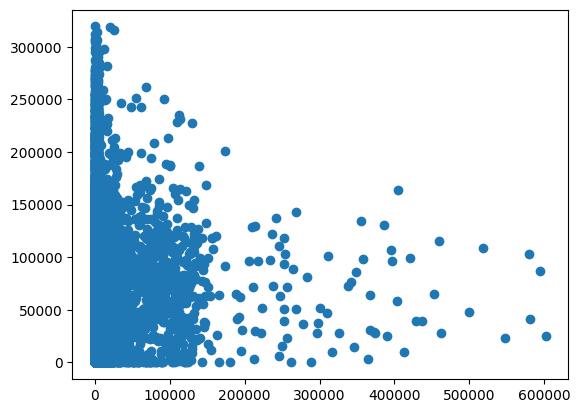

In [ ]:
### Scatter plot no 2

x = (visa_df["no_of_employees"])
y = visa_df["prevailing_wage"]

plt.scatter(x,y)
plt.show()


# Obervation
# No relation

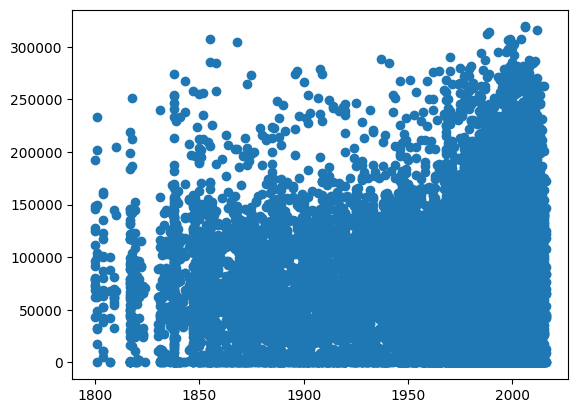

In [ ]:
x = (visa_df["yr_of_estab"])
y = visa_df["prevailing_wage"]

plt.scatter(x,y)
plt.show()

AttributeError: 'Axes' object has no attribute 'plt'

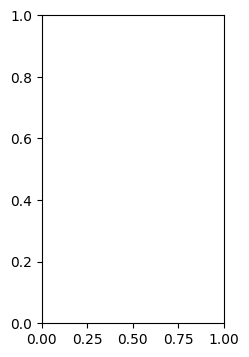

In [ ]:
plt.figure(figsize=(8,4))


x = (visa_df["no_of_employees"])
y = visa_df["yr_of_estab"]

plt.subplot(1,3,1).plt.scatter(x,y)


x = visa_df["no_of_employees"]
y = visa_df["prevailing_wage"]

plt.subplot(1,3,2).plt.scatter(x,y)


x = visa_df["yr_of_estab"]
y = visa_df["prevailing_wage"]

plt.subplot(1,3,3).plt.scatter(x,y)
plt.show()

## Pearson correlation coefficient
- it is denoted with r
- r variires from 0,1
- for posetrive r varies 0,1
- for negetive r resies r vaires -1 ,0 
-  for no relation r aprromixate 0
- in python we have **Corr function in pandas
    - this will give covariance matrrix 
    - we already discuss covariance matrix is rows and columns type
    - in this data we have 3 numerical columns
    -  so we will get 3*3 = 9 values
    - all gtrace of matrix represnt varriance
    - upper trangle and lower trannghle represnt co varinace

<img class="XqHOTb IGEbUc" alt="r =\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2} \sum\left(y_{i}-\bar{y}\right)^{2}}}" src="https://www.gstatic.com/education/formulas2/553212783/en/correlation_coefficient_formula.svg" role="img" data-csiid="23" data-atf="0">

In [ ]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


### Observation
-  the correlation between no_of_employees and yr_of_estab is aprox is 0  so no reln
- the correlation between no_of_employees and prevailing_wage is aprox is prevailing_wage so there is no reln


### What happend if correlation is high
-  for theta we read wine quality dataset

<Axes: >

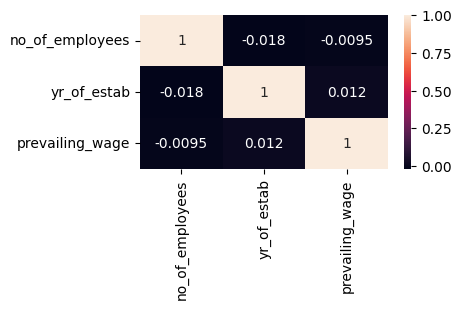

In [52]:
visa_corr = visa_df.corr(numeric_only=True)
plt.figure(figsize=(4,2))
sns.heatmap(visa_corr,annot=True)

In [44]:
wine_df = pd.read_csv(r"C:\Users\SAMAR\PycharmProjects\Naresh IT\Classroom\Python seassons\data files\winequality_red - winequality_red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
wine_df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [45]:
wine_data = wine_df.drop_duplicates()

In [46]:
wine_data.iloc[1:,:]   # index are not in order

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
3,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
7,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
11,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
3189,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
3191,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
3195,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [48]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
3,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
7,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0


In [35]:
# wine_df.corr(numeric_only=True)

In [37]:
# wine_df.cov(numeric_only=True)